***Librairies***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,precision_recall_curve

from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
bank_ds=pd.read_csv("bank.csv")

In [3]:
bank_ds.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [4]:
bank_ds.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [5]:
bank_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


there is no missing values,so this is a good thing .

C:\Users\Dima D'origine\AppData\Local\Temp\ipykernel_20412\3123990530.py:21: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



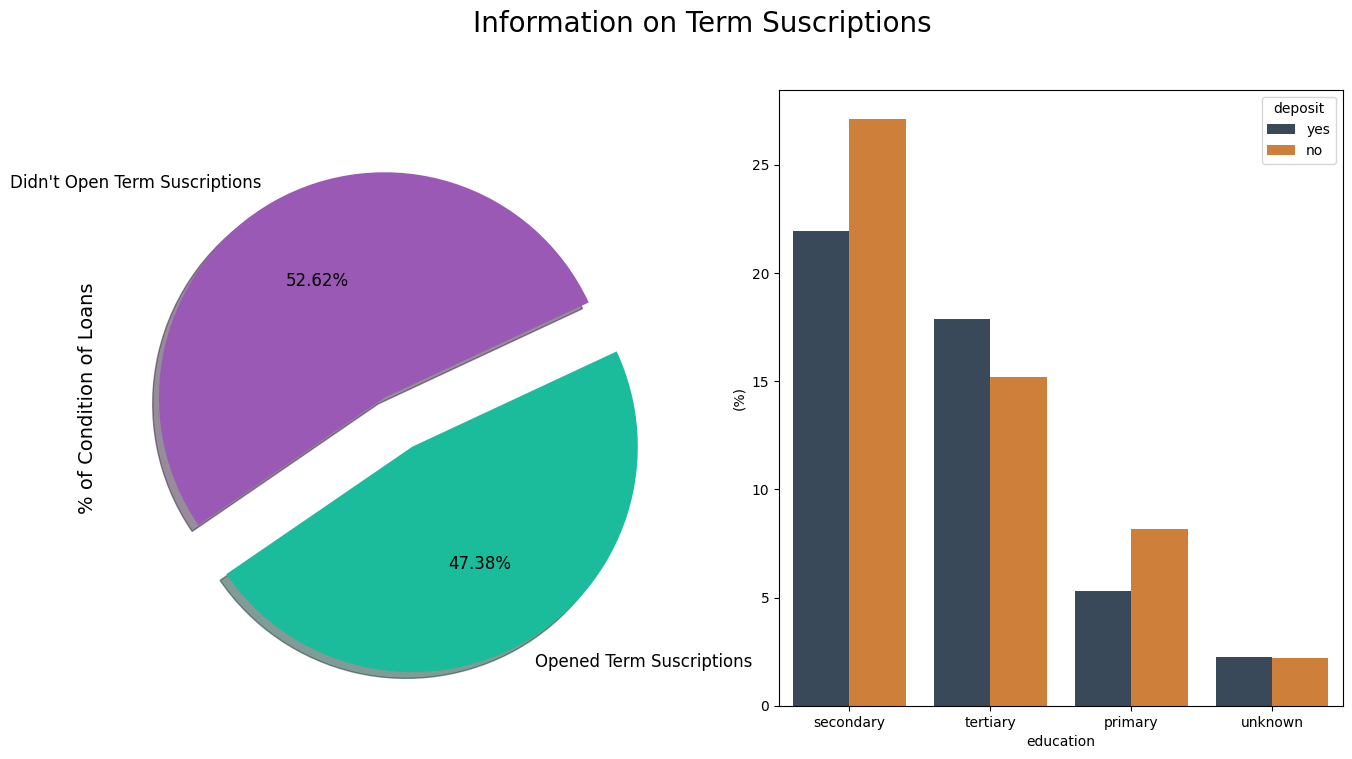

In [6]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#9b59b6", "#1abc9c"]
labels ="Didn't Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=20)

bank_ds["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_condition', data=df, ax=ax[1], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
palette = ["#34495e", "#e67e22"]

sns.barplot(x="education", y="balance", hue="deposit", data=bank_ds, palette=palette, estimator=lambda x: len(x) / len(bank_ds) * 100)
ax[1].set(ylabel="(%)")
ax[1].set_xticklabels(bank_ds["education"].unique(), rotation=0, rotation_mode="anchor")
plt.show()

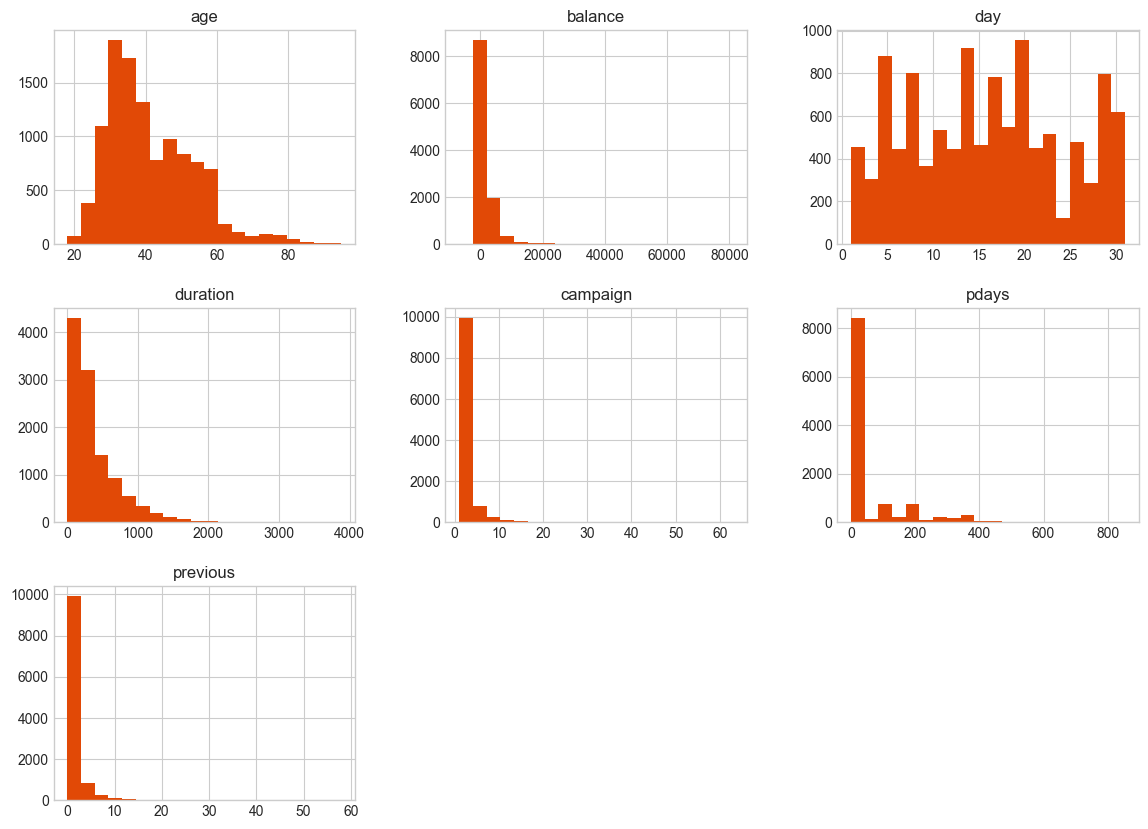

In [7]:
# Let's see how the numeric data is distributed.
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

bank_ds.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

C:\Users\Dima D'origine\AppData\Local\Temp\ipykernel_20412\4006884255.py:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



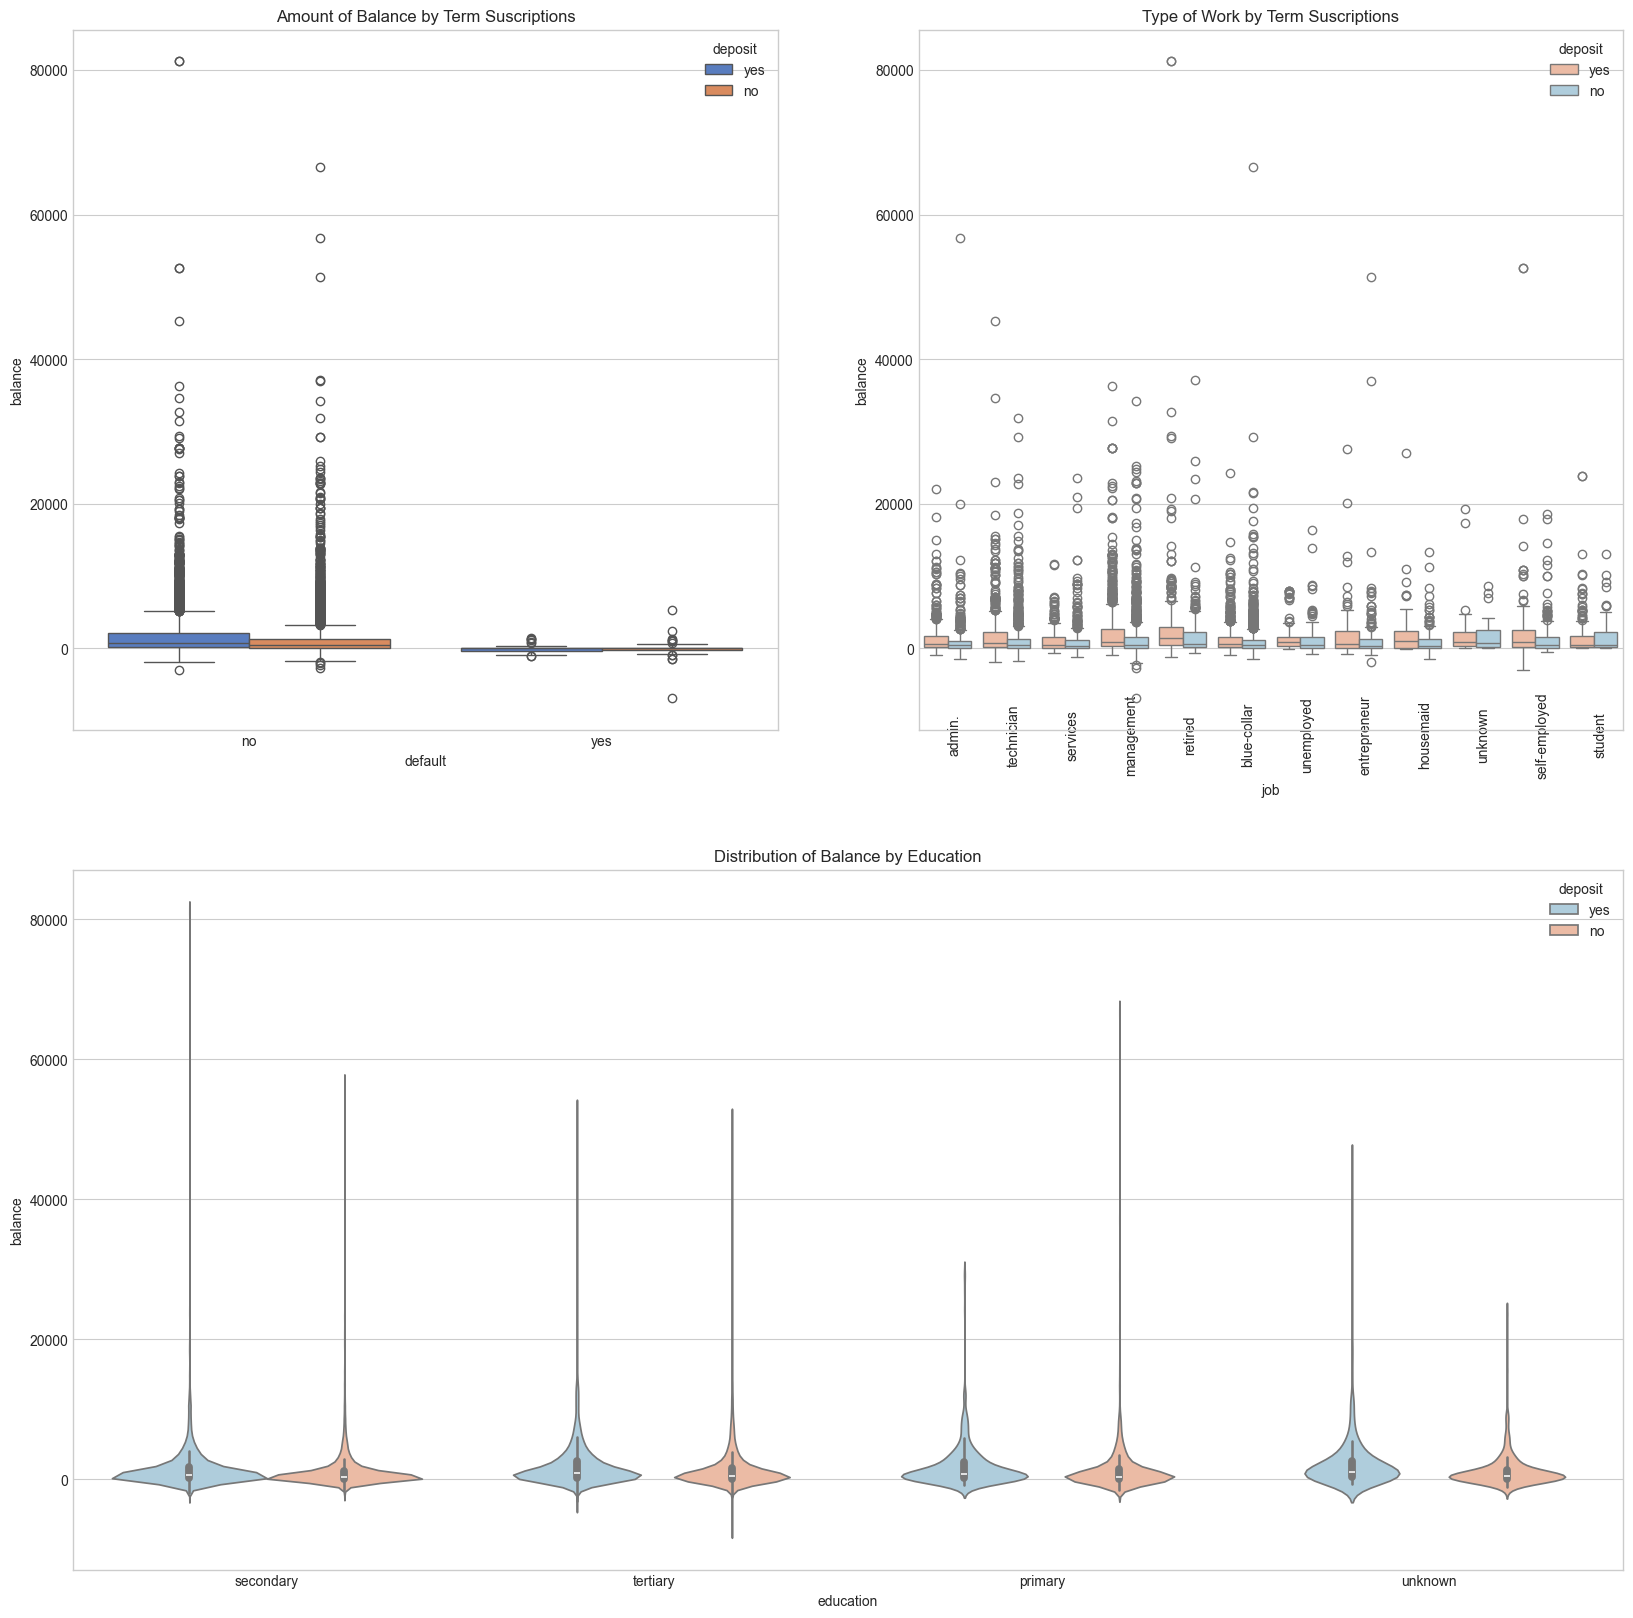

In [8]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=bank_ds, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=bank_ds, palette="RdBu", ax=ax2)

g1.set_xticklabels(bank_ds["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=bank_ds, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

***Analysis by Occupation:***

Number of Occupations: Management is the occupation that is more prevalent in this dataset.
Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.
Balance by Occupation: Management and Retirees are the ones who have the highest balance in their accounts.

In [9]:
bank_ds['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [10]:
# Drop the Job Occupations that are "Unknown"
bank_ds = bank_ds.drop(bank_ds.loc[bank_ds["job"] == "unknown"].index)

# Admin and management are basically the same let's put it under the same categorical value
lst = [bank_ds]

for col in lst:
    col.loc[col["job"] == "admin.", "job"] = "management"

In [11]:
bank_ds.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

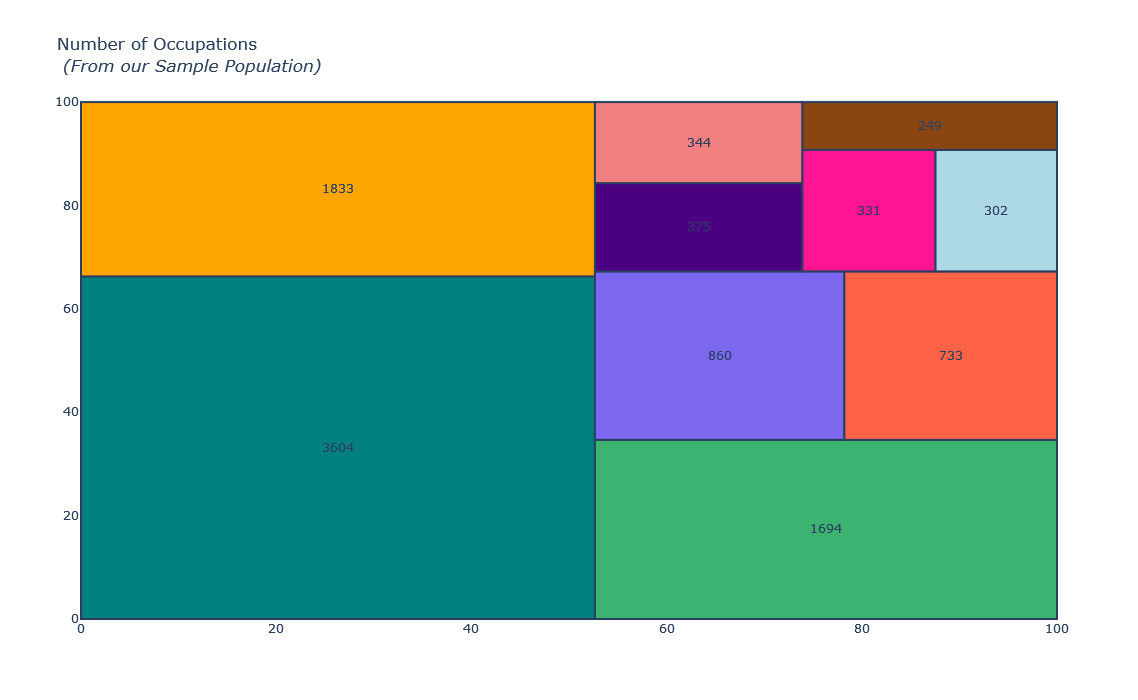

In [12]:
import squarify
bank_ds = bank_ds.drop(bank_ds.loc[bank_ds["balance"] == 0].index)

x = 0
y = 0
width = 100
height = 100

job_names = bank_ds['job'].value_counts().index
values = bank_ds['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = [
    'rgb(0, 128, 128)',    # Teal
    'rgb(255, 165, 0)',    # Orange
    'rgb(60, 179, 113)',   # Medium Sea Green
    'rgb(123, 104, 238)',  # Medium Slate Blue
    'rgb(255, 99, 71)',    # Tomato
    'rgb(75, 0, 130)',     # Indigo
    'rgb(240, 128, 128)',  # Light Coral
    'rgb(255, 20, 147)',   # Deep Pink
    'rgb(173, 216, 230)',  # Light Blue
    'rgb(139, 69, 19)'     # Saddle Brown
]
shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)
# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

In [13]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = bank_ds.loc[bank_ds["deposit"] == "yes"]

occupations = bank_ds["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values


ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
         ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [14]:
bank_ds['marital'].value_counts()

marital
married     5815
single      3336
divorced    1174
Name: count, dtype: int64

In [15]:
bank_ds['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [16]:
bank_ds['marital'].value_counts().tolist()

[5815, 3336, 1174]

In [17]:
vals = bank_ds['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)


iplot(fig, filename='basic-bar')

In [18]:
# Distribution of Balances by Marital status
single = bank_ds['balance'].loc[bank_ds['marital'] == 'single'].values
married = bank_ds['balance'].loc[bank_ds['marital'] == 'married'].values
divorced = bank_ds['balance'].loc[bank_ds['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)

married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)

fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\Dima D'origine\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [19]:
fig = ff.create_facet_grid(
    bank_ds,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

Clustering Marital Status and Education:

Marital Status: As previously mentioned, experiencing a divorce greatly affects an individual's balance.
Education: The education level of a prospect plays a crucial role in determining their balance amount.
Loans: The presence of previous loans significantly influences the balance of a prospect.

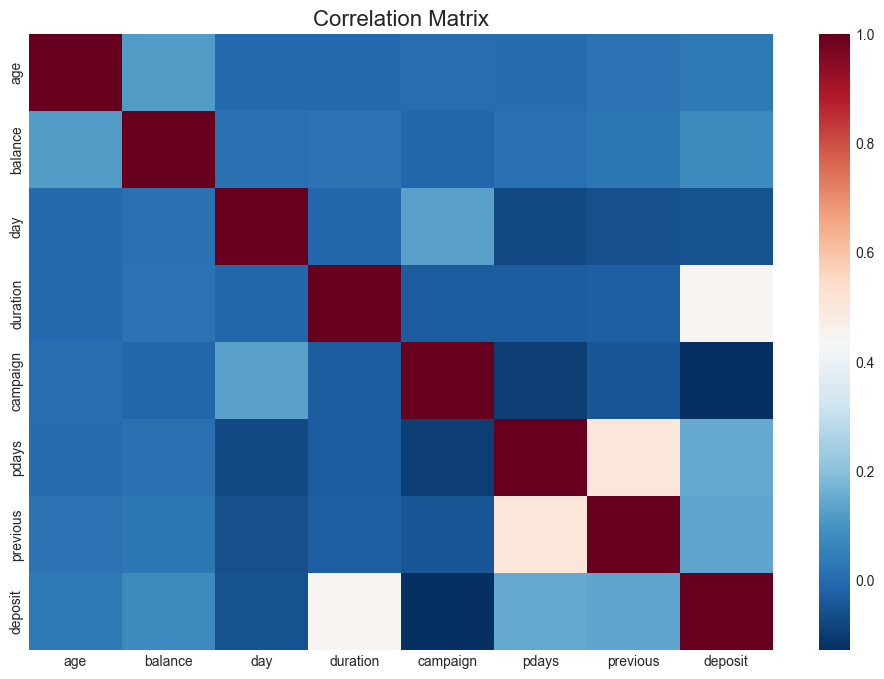

In [20]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
bank_ds['deposit'] = LabelEncoder().fit_transform(bank_ds['deposit'])



# Separate both dataframes into 
numeric_df = bank_ds.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

C:\Users\Dima D'origine\AppData\Local\Temp\ipykernel_20412\3575517115.py:9: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'below_average' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



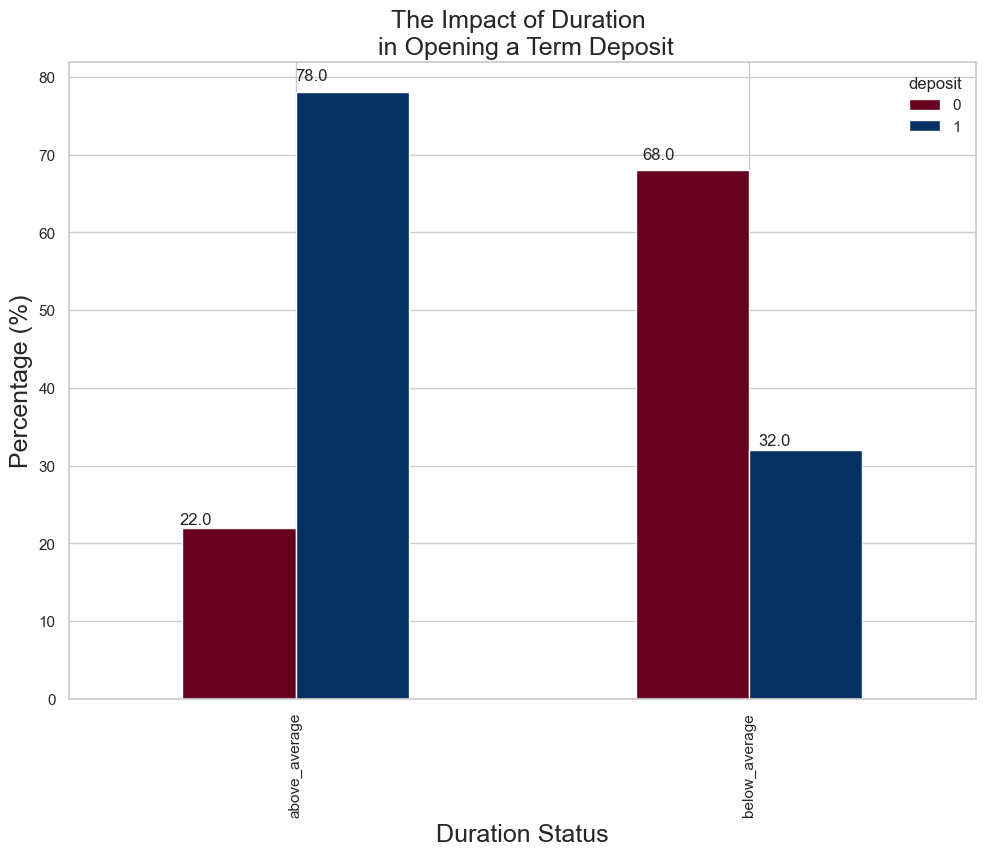

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = bank_ds['duration'].mean()

lst = [bank_ds]
bank_ds["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(bank_ds['duration_status'], bank_ds['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

***Label Encoder***

In [22]:
le = LabelEncoder()
bank_ds.marital = le.fit_transform(bank_ds.marital)
bank_ds.housing = le.fit_transform(bank_ds.housing)
bank_ds.deposit = le.fit_transform(bank_ds.deposit)
bank_ds.loan = le.fit_transform(bank_ds.loan)
bank_ds.default = le.fit_transform(bank_ds.default)

In [23]:
import pickle
def get_encoder_inst(feature_col):
    assert isinstance(feature_col, pd.Series)
    feature_vec = feature_col.sort_values().values.reshape(-1, 1)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(feature_vec) 
  
    filename = '.pickle'
    pickle.dump(enc, open(filename, 'wb'))
    return enc

def get_one_hot_enc(feature_col, enc,cols):
  
    assert isinstance(feature_col, pd.Series)
    assert isinstance(enc, OneHotEncoder)
    unseen_vec = feature_col.values.reshape(-1, 1)
    encoded_vec = enc.transform(unseen_vec).toarray()
    column_name = enc.get_feature_names([cols])
    encoded_df = pd.DataFrame(encoded_vec, columns= column_name)
    return encoded_df

In [24]:
bank_ds.head()

age         job  marital  education  default  balance  housing  loan  \
0   59  management        1  secondary        0     2343        1     0   
1   56  management        1  secondary        0       45        0     0   
2   41  technician        1  secondary        0     1270        1     0   
3   55    services        1  secondary        0     2476        1     0   
4   54  management        1   tertiary        0      184        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome  deposit  \
0  unknown    5   may      1042         1     -1         0  unknown        1   
1  unknown    5   may      1467         1     -1         0  unknown        1   
2  unknown    5   may      1389         1     -1         0  unknown        1   
3  unknown    5   may       579         1     -1         0  unknown        1   
4  unknown    5   may       673         2     -1         0  unknown        1   

  duration_status  
0   above_average  
1   above_average  
2   above_average  
3   above_average  
4   above_average

***One-Hot Encoding***

In [25]:
def get_encoder_inst(feature_col):
  
    assert isinstance(feature_col, pd.Series)
    feature_vec = feature_col.sort_values().values.reshape(-1, 1)
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(feature_vec) 
  
    filename = '.pickle'
    pickle.dump(enc, open(filename, 'wb'))
    return enc

def get_one_hot_enc(feature_col, enc,cols):
  
    assert isinstance(feature_col, pd.Series)
    assert isinstance(enc, OneHotEncoder)
    unseen_vec = feature_col.values.reshape(-1, 1)
    encoded_vec = enc.transform(unseen_vec).toarray()
    column_name = enc.get_feature_names([cols])
    encoded_df = pd.DataFrame(encoded_vec, columns= column_name)
    return encoded_df

In [26]:
ohe_cat_list = ['job','education','month','contact','poutcome','duration_status']
ohe_cat_data = bank_ds[ohe_cat_list]
bank_ds.drop(ohe_cat_list,axis=1,inplace=True)

In [27]:
def get_encoder_inst(feature_col):
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    encoder.fit(feature_col.values.reshape(-1, 1))
    return encoder

def get_one_hot_enc(feature_col, enc, cols):
    unseen_vec = feature_col.values.reshape(-1, 1)
    encoded_vec = enc.transform(unseen_vec)
    column_name = enc.get_feature_names_out([cols])
    encoded_df = pd.DataFrame(encoded_vec, columns=column_name)
    return encoded_df

In [28]:
X = bank_ds.drop('deposit',axis=1)
y = bank_ds[['deposit']]

In [29]:
KF = KFold(n_splits=3,shuffle=True)
for train_index, test_index in KF.split(X):
    x_train, x_test = X.iloc[list(train_index)], X.iloc[list(test_index)]
    y_train, y_test = y.iloc[list(train_index)], y.iloc[list(test_index)]

In [30]:
print("Train data shape:{}".format(x_train.shape))
print("Test data shape:{}".format(x_test.shape))

Train data shape:(6884, 11)
Test data shape:(3441, 11)


***Scaling Data***

In [31]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

***Decision Tree Model***

In [32]:
DT = DecisionTreeClassifier()

In [33]:
DT.fit(scaled_train,y_train)

DecisionTreeClassifier()

In [34]:
pred = DT.predict(scaled_test)

In [35]:
accuracy=accuracy_score(y_test,pred)

In [36]:
print(accuracy)

0.7297297297297297


In [37]:
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,None], #max depth tree can grow; default is none
              'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator
             }

In [38]:
tune_model = GridSearchCV(DecisionTreeClassifier(), 
                          param_grid=param_grid, 
                          scoring = 'roc_auc',
                          cv = 5,
                          verbose=0)
tune_model.fit(scaled_train, y_train)

C:\Users\Dima D'origine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


3000 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dima D'origine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dima D'origine\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dima D'origine\AppData\Local\Programs\Python\

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'max_features': [None, 'auto'],
                         'min_samples_leaf': [1, 5, 10, 0.03, 0.05],
                         'min_samples_split': [2, 5, 10, 0.03, 0.05],
                         'random_state': [0], 'splitter': ['best', 'random']},
             scoring='roc_auc')

In [39]:
print('\033[1m'+'Decision Tree Parameters:{} '.format(tune_model.best_params_))

Decision Tree Parameters:{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10, 'min_samples_split': 0.03, 'random_state': 0, 'splitter': 'best'} 


In [40]:
dt_tuned =  DecisionTreeClassifier(criterion='gini',
                                   min_samples_split=0.03,
                                   max_depth=None,
                                    max_features = None,
                                   min_samples_leaf=10,
                                   random_state = 0,
                                   splitter='random')

dt_tuned.fit(scaled_train,y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=0.03,
                       random_state=0, splitter='random')

In [41]:
pred = dt_tuned.predict(scaled_test)

In [42]:
accuracy_score(y_test,pred)

0.7858180761406568

In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78      1733
           1       0.77      0.81      0.79      1708

    accuracy                           0.79      3441
   macro avg       0.79      0.79      0.79      3441
weighted avg       0.79      0.79      0.79      3441



In [44]:
y_scores = dt_tuned.predict_proba(scaled_train)

if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
    
precisions, recalls, threshold = precision_recall_curve(y_train, y_scores,)

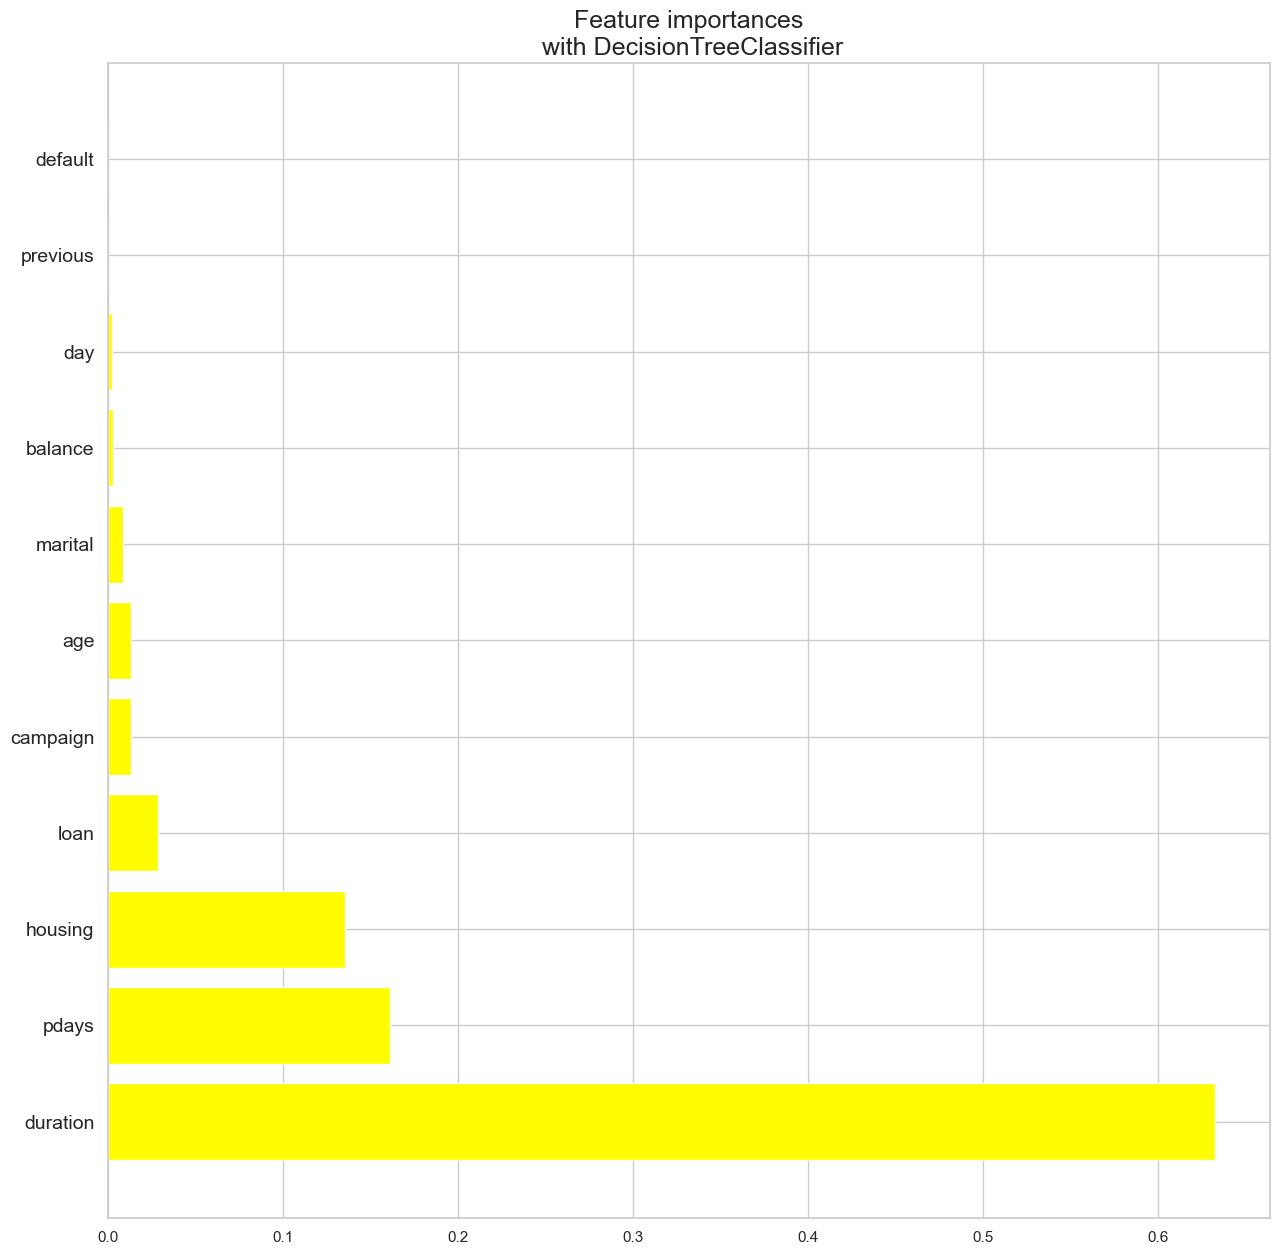

In [45]:

tree_model = dt_tuned.fit(scaled_train, y_train)
importances = tree_model.feature_importances_
feature_names = bank_ds.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(15,15))
    plt.title(" Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#fffb00',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])

feature_importance_graph(indices, importances, feature_names)
plt.show()


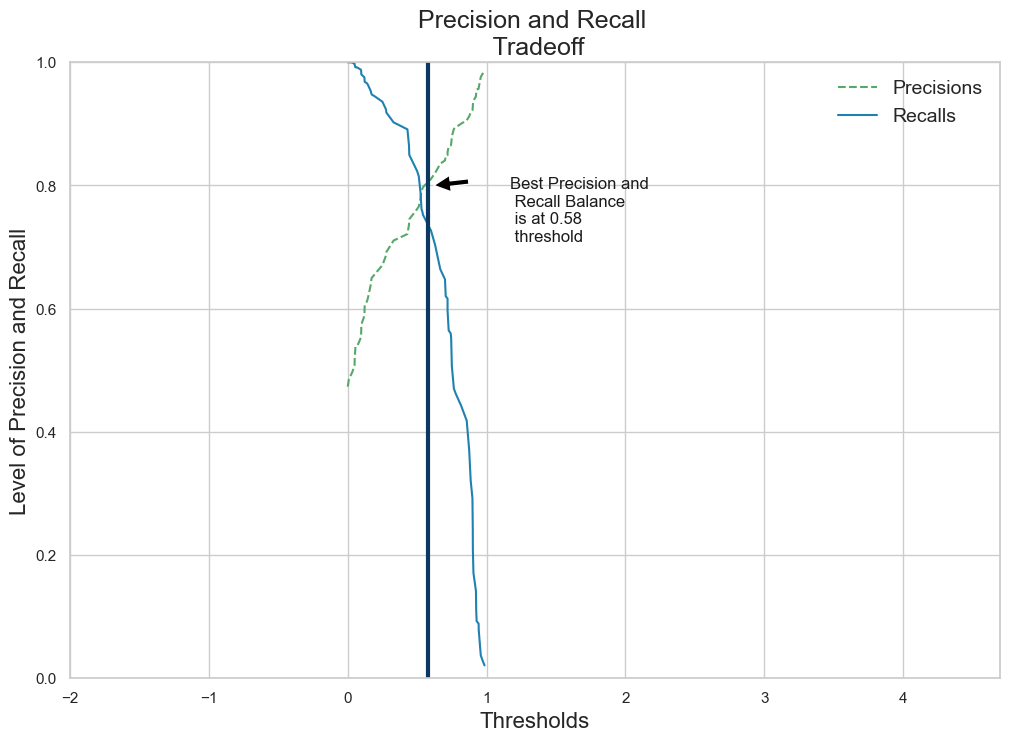

In [46]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "g--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#1e81b0", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.58, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.58 \n threshold ', xy=(0.62, 0.80), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.5),
                fontsize=12, 
                color='k')
    plt.show()
    
precision_recall_curve(precisions, recalls,threshold)

***Tree Plot***

In [47]:
fig = plt.figure(figsize=(150,150))
_ = tree.plot_tree(dt_tuned, feature_names=feature_names,
                    class_names= ['yes','no'],
                   filled=True)